In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [3]:
data = []

with open("./data/all_scripts.txt", "r") as f:
    for line in f:
        line=line.strip()
        if line.startswith(">> Series"):
            season = int(line[len(">> Series "):len(">> Series ")+2])
            episode = line[len(">> Series ")+2:]
            continue
        elif line.startswith("> "):
            scene = line[len("> "):]
            continue
        else:
            line_split = line.split(":")
            character = line_split[0]
            text = ":".join(line_split[1:])
            data.append(
                dict(
                    season=season,
                    episode=episode,
                    scene=scene,
                    character=character,
                    line=text
                )
            )

data = pd.DataFrame(data)
data

,season,episode,scene,character,line
0,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wi...
1,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good id..."
3,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...,...
51287,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with ..."
51288,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a r..."
51289,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Ramona,What if I were?
51290,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. ..."


In [4]:
(
    data.groupby(["season", "episode", "scene"])
    .aggregate(
        {
            "scene":"count"
        }
    )
    .rename(columns={"scene":"scene_count"})
    .reset_index()
    .value_counts("season")
    .to_frame()
    .sort_index()
)

,count
season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [5]:
recurrent_characters = (
    data.groupby("character")
    .aggregate(
        {
            "line":"count"
        }
    )
    .query("line > 90")
    .sort_values("line", ascending=False)
    .rename(columns={"line":"nb_lines"})
)
display(recurrent_characters)
print(f"{recurrent_characters.index.shape=}")
print(f"{recurrent_characters.index.to_list()=}")

recurrent_characters.drop(index="Man", inplace=True)
print(f"After manual removal of `Man`: {recurrent_characters.index.shape=}")


,nb_lines
character,
Sheldon,11689
Leonard,9829
Penny,7677
Howard,5872
Raj,4779
Amy,3472
Bernadette,2690
Stuart,733
Priya,222


recurrent_characters.index.shape=(20,)
recurrent_characters.index.to_list()=['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Amy', 'Bernadette', 'Stuart', 'Priya', 'Mrs Cooper', 'Emily', 'Beverley', 'Mrs Wolowitz', 'Zack', 'Arthur', 'Wil', 'Leslie', 'Kripke', 'Man', 'Bert']
After manual removal of `Man`: recurrent_characters.index.shape=(19,)


In [6]:
recurrent_characters_data = data[data["character"].isin(recurrent_characters.index)]
print(f"After keeping the lines of only recurrent characters : \n\t• {recurrent_characters_data.shape=}\n\t• {data.shape=}")

After keeping the lines of only recurrent characters : 
	• recurrent_characters_data.shape=(48346, 5)
	• data.shape=(51292, 5)


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [7]:
from helpers.helper_functions import EXCLUDE_CHARS

def clean_lines(line:str)->str:
    """Cleans the lines"""
    for char in EXCLUDE_CHARS:
        line = line.replace(char, " ")
    return line.lower()

recurrent_characters_data["line"] = recurrent_characters_data["line"].apply(clean_lines)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/346752494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recurrent_characters_data["line"] = recurrent_characters_data["line"].apply(clean_lines)


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [8]:
words = [
    word
    for word in " ".join(recurrent_characters_data["line"]).split(" ")
    if word != ""
]

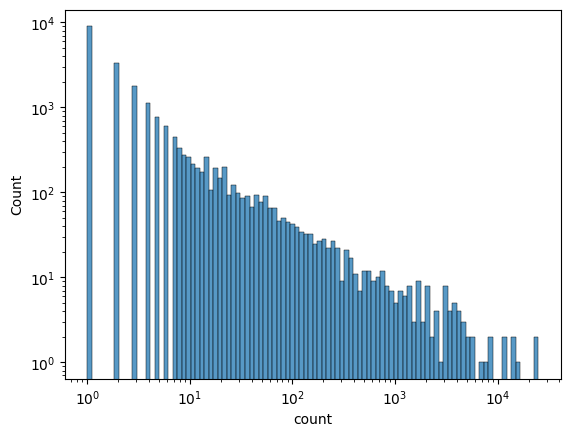

In [9]:
import seaborn as sns

sns.histplot(
    data=pd.DataFrame(words, columns=["words"]).value_counts("words"),
    bins=100,
    log_scale=True,
)
plt.yscale("log")

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [10]:
recurrent_characters_data["line"].str.split(" ")

0        [, so, if, a, photon, is, directed, through, a...
1                     [, agreed, , what, s, your, point, ]
2        [, there, s, no, point, , i, just, think, it, ...
3                                         [, excuse, me, ]
5        [, one, across, is, aegean, , eight, down, is,...
                               ...                        
51284    [, uh, , breakfast, yes, , lunch, no, , i, did...
51286                  [, how, thoughtful, , thank, you, ]
51288    [, and, i, with, you, , question, , are, you, ...
51290    [, well, , that, would, raise, a, number, of, ...
51291    [, , knock, , knock, , knock, , amy, , , knock...
Name: line, Length: 48346, dtype: object

In [11]:
filter_empty_strings = lambda strings : [string for string in strings if string != ""]
recurrent_characters_data["words_uttered"] = recurrent_characters_data["line"].str.split(" ").apply(filter_empty_strings).apply(len)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/229343332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recurrent_characters_data["words_uttered"] = recurrent_characters_data["line"].str.split(" ").apply(filter_empty_strings).apply(len)


In [12]:
words_uttered = (
    recurrent_characters_data
    .groupby("character")
    .aggregate(
        {
            "words_uttered":"sum"
        }
    )
    .sort_values("words_uttered", ascending=False)
)
words_uttered

,words_uttered
character,
Sheldon,185393
Leonard,102498
Penny,79272
Howard,69505
Raj,60099
Amy,39933
Bernadette,27726
Stuart,7955
Mrs Cooper,3389


**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

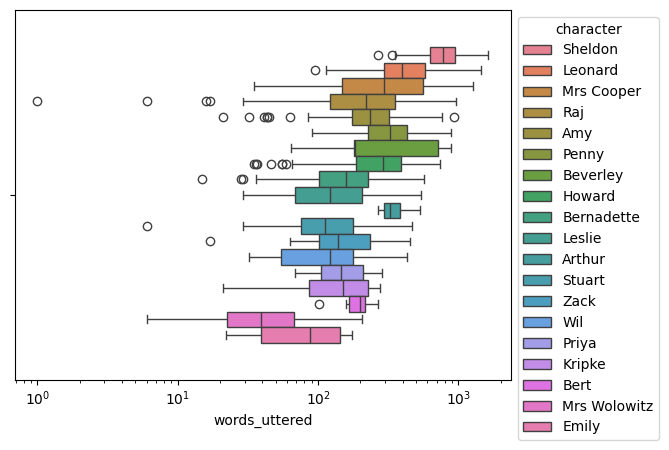

In [13]:
words_uttered_per_episode = (
    recurrent_characters_data
    .groupby(["character", "episode"])
    .aggregate(
        {
            "words_uttered":"sum"
        }
    )
    .sort_values("words_uttered", ascending=False)
    .reset_index()
)

ax = sns.boxplot(
    data=words_uttered_per_episode,
    x="words_uttered",
    hue="character",
    log_scale=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [14]:
median_words_uttered_per_episode = (
    words_uttered_per_episode
    .groupby("character")
    .aggregate(
        {"words_uttered":"median"}
    )
    .sort_values("words_uttered", ascending=False)
)

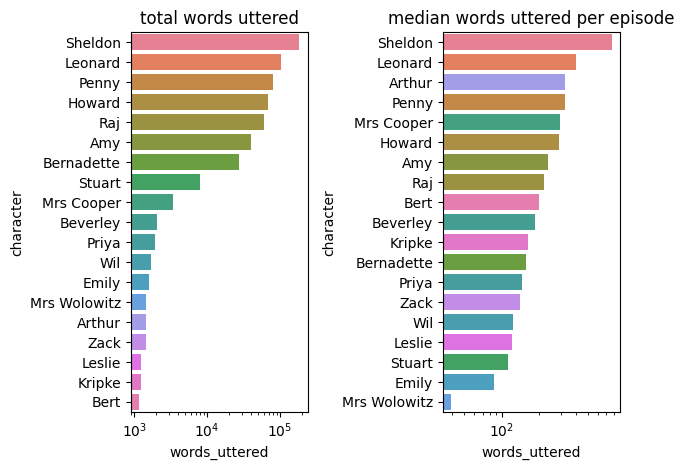

In [15]:
fig, axes = plt.subplots(ncols=2)

for ax, title, data in zip(axes.flatten(), ["total words uttered", "median words uttered per episode"], [words_uttered, median_words_uttered_per_episode]):
    ax.set_title(title)
    sns.barplot(
        data.reset_index(),
        x="words_uttered",
        y="character",
        hue="character",
        hue_order=words_uttered.index,
        ax=ax,
    )
    ax.set_xscale("log")

plt.tight_layout()
plt.show()

In [16]:
words_uttered_per_scene = (
    recurrent_characters_data
    .groupby(["character", "episode", "scene"])
    .aggregate(
        {
            "words_uttered":"sum"
        }
    )
    .sort_values("words_uttered", ascending=False)
    .reset_index()
)
median_words_uttered_per_scene = (
    words_uttered_per_scene
    .groupby("character")
    .aggregate(
        {"words_uttered":"median"}
    )
    .sort_values("words_uttered", ascending=False)
)

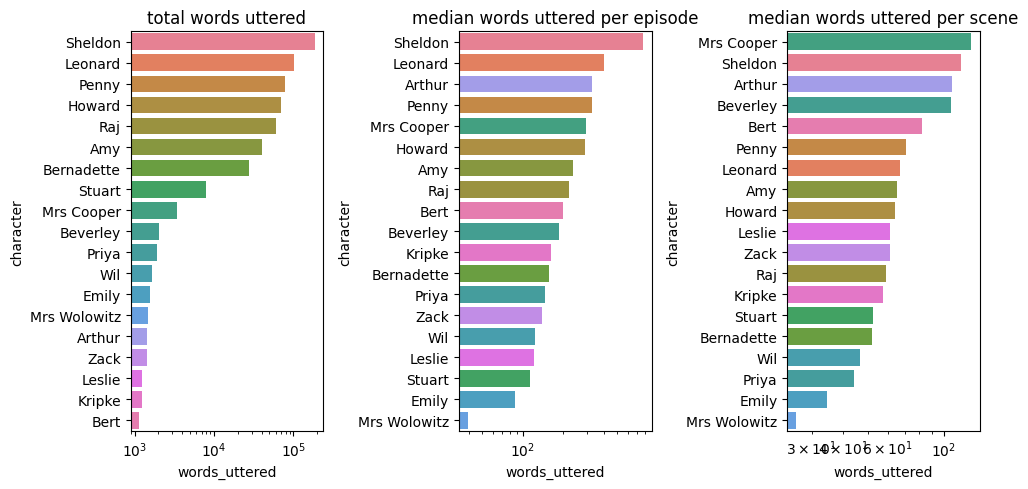

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

for ax, title, data in zip(axes.flatten(), ["total words uttered", "median words uttered per episode", "median words uttered per scene"], [words_uttered, median_words_uttered_per_episode, median_words_uttered_per_scene]):
    ax.set_title(title)
    sns.barplot(
        data.reset_index(),
        x="words_uttered",
        y="character",
        hue="character",
        hue_order=words_uttered.index,
        ax=ax,
    )
    ax.set_xscale("log")

plt.tight_layout()
plt.show()

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [18]:
task_C_data = recurrent_characters_data[recurrent_characters_data["character"].isin(recurrent_characters.drop(index=["Mrs Cooper", "Mrs Wolowitz"]).index)]
task_C_data


,season,episode,scene,character,line,words_uttered
0,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wi...,57
1,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point,5
2,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good id...,16
3,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me,2
5,1,Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov ...,39
...,...,...,...,...,...,...
51284,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a cou...,21
51286,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,how thoughtful thank you,4
51288,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,and i with you question are you seeking a r...,13
51290,10,Episode 24 – The Long Distance Dissonance,Sheldon’s office.,Sheldon,well that would raise a number of problems ...,21


In [ ]:
task_C_characters = task_C_data["character"].unique().tolist()

nb_characters= len(task_C_characters)
A = np.zeros((nb_characters, nb_characters)) 

for _, df in task_C_data.groupby(["season", "episode", "scene"]):
    for character_i in df["character"].unique():
        for character_j in df["character"].unique():
            if character_i == character_j:
                continue
            A[task_C_characters.index(character_i), task_C_characters.index(character_j)] += 1

In [44]:
A = pd.DataFrame(A, columns=task_C_characters, index=task_C_characters)

In [43]:
graph_data = A.stack().reset_index().rename(columns={"level_0":"character_i", "level_1":"character_j", 0:"weight"}).query("character_i != character_j and weight != 0")

In [107]:
A

,Sheldon,Leonard,Penny,Howard,Raj,Leslie,Kripke,Beverley,Stuart,Bernadette,Wil,Zack,Amy,Priya,Arthur,Bert,Emily
Sheldon,0.0,870.0,583.0,538.0,493.0,15.0,18.0,11.0,68.0,137.0,13.0,15.0,335.0,23.0,10.0,10.0,7.0
Leonard,870.0,0.0,614.0,572.0,520.0,14.0,14.0,14.0,56.0,144.0,15.0,15.0,228.0,31.0,5.0,7.0,8.0
Penny,583.0,614.0,0.0,303.0,266.0,5.0,1.0,13.0,40.0,223.0,8.0,17.0,307.0,12.0,2.0,4.0,8.0
Howard,538.0,572.0,303.0,0.0,600.0,11.0,9.0,6.0,83.0,281.0,8.0,12.0,129.0,18.0,1.0,6.0,13.0
Raj,493.0,520.0,266.0,600.0,0.0,9.0,12.0,4.0,79.0,184.0,11.0,8.0,140.0,18.0,1.0,7.0,32.0
Leslie,15.0,14.0,5.0,11.0,9.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Kripke,18.0,14.0,1.0,9.0,12.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
Beverley,11.0,14.0,13.0,6.0,4.0,1.0,0.0,0.0,3.0,4.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0
Stuart,68.0,56.0,40.0,83.0,79.0,1.0,2.0,3.0,0.0,54.0,6.0,4.0,35.0,0.0,0.0,1.0,3.0
Bernadette,137.0,144.0,223.0,281.0,184.0,1.0,0.0,4.0,54.0,0.0,1.0,4.0,196.0,10.0,0.0,0.0,13.0


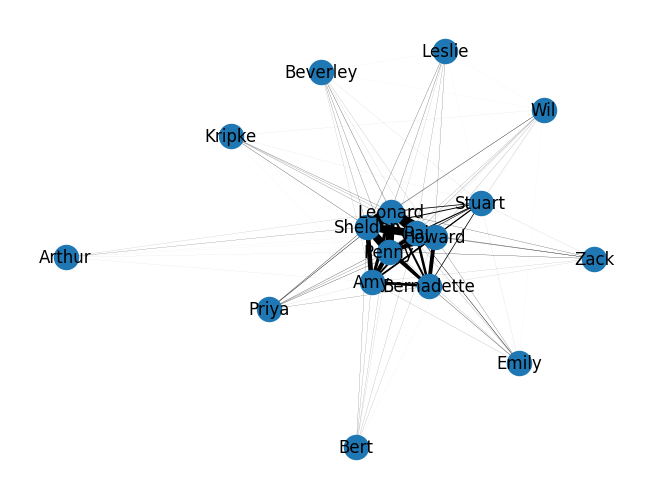

In [64]:
import networkx as nx

G = nx.Graph(A)
# G.add_nodes_from(task_C_characters)
# G.add_weighted_edges_from(list(graph_data.itertuples(index=False, name=None)))

nx.draw(G, with_labels=True, width = [(edge_data["weight"])/100 for _, _, edge_data in G.edges(data=True)])

In [73]:
A_gossip = np.zeros((nb_characters, nb_characters))

for _, df in task_C_data.groupby(["season", "episode", "scene"]):
    # display(_, df)
    # break
    
    for character_gossiping in df["character"].unique():
        text = " ".join(df.query(f"character == '{character_gossiping}'")["line"]).split()
        for character_being_gossiped in task_C_characters:
            if character_being_gossiped in df["character"].unique():
                continue
            elif character_being_gossiped.lower() in text:
                A_gossip[task_C_characters.index(character_gossiping), task_C_characters.index(character_being_gossiped)] += 1

In [74]:
A_gossip = pd.DataFrame(A_gossip, columns=task_C_characters, index=task_C_characters)
A_gossip

,Sheldon,Leonard,Penny,Howard,Raj,Leslie,Kripke,Beverley,Stuart,Bernadette,Wil,Zack,Amy,Priya,Arthur,Bert,Emily
Sheldon,0.0,75.0,55.0,27.0,14.0,2.0,12.0,1.0,11.0,16.0,10.0,4.0,67.0,3.0,4.0,2.0,2.0
Leonard,45.0,0.0,80.0,28.0,22.0,2.0,5.0,1.0,14.0,20.0,3.0,2.0,27.0,9.0,2.0,2.0,3.0
Penny,35.0,77.0,0.0,23.0,19.0,1.0,1.0,0.0,5.0,26.0,3.0,5.0,33.0,12.0,0.0,3.0,3.0
Howard,14.0,6.0,27.0,0.0,21.0,3.0,1.0,0.0,8.0,43.0,0.0,1.0,11.0,1.0,0.0,0.0,9.0
Raj,10.0,10.0,21.0,16.0,0.0,1.0,2.0,0.0,4.0,14.0,1.0,0.0,9.0,1.0,0.0,1.0,21.0
Leslie,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kripke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beverley,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stuart,1.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Bernadette,15.0,15.0,7.0,22.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,3.0


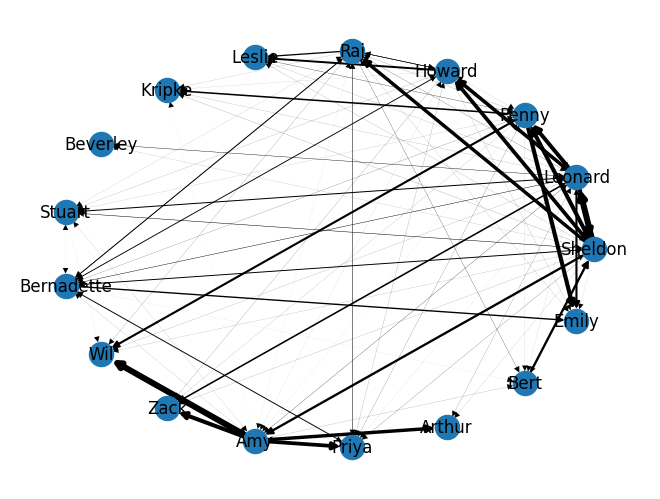

In [81]:
G_gossip = nx.DiGraph(A_gossip)
# G.add_nodes_from(task_C_characters)
# G.add_weighted_edges_from(list(graph_data.itertuples(index=False, name=None)))

nx.draw_circular(G_gossip, with_labels=True, width = [(edge_data["weight"])/200 for _, _, edge_data in G.edges(data=True)])

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [88]:
nx.is_connected(G)

True

In [105]:
nx.diameter(G)

2

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [106]:
nx.betweenness_centrality(G)

{'Sheldon': 0.04351851851851851,
 'Leonard': 0.04351851851851851,
 'Penny': 0.04351851851851851,
 'Howard': 0.04351851851851851,
 'Raj': 0.04351851851851851,
 'Leslie': 0.0,
 'Kripke': 0.0,
 'Beverley': 0.0,
 'Stuart': 0.019708994708994704,
 'Bernadette': 0.01316137566137566,
 'Wil': 0.006018518518518519,
 'Zack': 0.0,
 'Amy': 0.04351851851851851,
 'Priya': 0.0,
 'Arthur': 0.0,
 'Bert': 0.0,
 'Emily': 0.0}

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

<Axes: xlabel='degree', ylabel='index'>

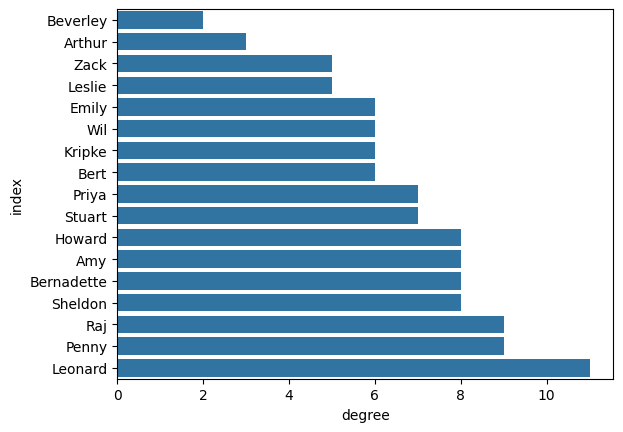

In [108]:
sns.barplot(
    pd.DataFrame(dict(G_gossip.in_degree()), index=["degree"]).T.reset_index().sort_values("degree"),
    y="index",
    x="degree"
)

In [111]:
nx.diameter(G_gossip.to_undirected())

2

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

In [113]:
len(nx.shortest_path(G, source="Sheldon", target="Leonard"))


2

In [118]:
G_gossip.edges()

OutEdgeView([('Sheldon', 'Leonard'), ('Sheldon', 'Penny'), ('Sheldon', 'Howard'), ('Sheldon', 'Raj'), ('Sheldon', 'Leslie'), ('Sheldon', 'Kripke'), ('Sheldon', 'Beverley'), ('Sheldon', 'Stuart'), ('Sheldon', 'Bernadette'), ('Sheldon', 'Wil'), ('Sheldon', 'Zack'), ('Sheldon', 'Amy'), ('Sheldon', 'Priya'), ('Sheldon', 'Arthur'), ('Sheldon', 'Bert'), ('Sheldon', 'Emily'), ('Leonard', 'Sheldon'), ('Leonard', 'Penny'), ('Leonard', 'Howard'), ('Leonard', 'Raj'), ('Leonard', 'Leslie'), ('Leonard', 'Kripke'), ('Leonard', 'Beverley'), ('Leonard', 'Stuart'), ('Leonard', 'Bernadette'), ('Leonard', 'Wil'), ('Leonard', 'Zack'), ('Leonard', 'Amy'), ('Leonard', 'Priya'), ('Leonard', 'Arthur'), ('Leonard', 'Bert'), ('Leonard', 'Emily'), ('Penny', 'Sheldon'), ('Penny', 'Leonard'), ('Penny', 'Howard'), ('Penny', 'Raj'), ('Penny', 'Leslie'), ('Penny', 'Kripke'), ('Penny', 'Stuart'), ('Penny', 'Bernadette'), ('Penny', 'Wil'), ('Penny', 'Zack'), ('Penny', 'Amy'), ('Penny', 'Priya'), ('Penny', 'Bert'), ('Pe

In [127]:
for (character_i, character_j) in G_gossip.edges():
    if len(nx.shortest_path(G, source=character_i, target=character_j)) != 2:
        print(f"X: {character_i} has gossiped about {character_j} but they are not in a scene together!!!!")
    # else:
    #     print(f"VALID: {character_i} has gossiped about {character_j} (they know each other)")

X: Bernadette has gossiped about Bert but they are not in a scene together!!!!


## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [146]:
with open("./helpers/stopwords.txt") as f:
    stopwords = [word.replace("\n", "") for word in f]
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import simple_tokeniser


vectorizer = TfidfVectorizer(tokenizer=simple_tokeniser, stop_words=stopwords, min_df=2)
X_train = vectorizer.fit_transform(recurrent_characters_data.query("season <= 8")["line"])
X_test = vectorizer.transform(recurrent_characters_data.query("season > 8")["line"])
y_train = (recurrent_characters_data.query("season <= 8")["character"] == "Sheldon").astype(int).to_numpy()
y_test = (recurrent_characters_data.query("season > 8")["character"] == "Sheldon").astype(int).to_numpy()

/Users/wesleymonteith/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [148]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(X_train, y_train)

In [149]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.78572130986331

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [150]:
# your code goes here
from collections import Counter
def count_words(character_lines:pd.Series)->set:
    return set(Counter(" ".join(character_lines).split()).keys())

X_train_raw = recurrent_characters_data.query("season <= 8")
words_per_character = X_train_raw.groupby("character").aggregate(
    {
        "line":[count_words]
    }
)
unique_sheldon_words = words_per_character.loc["Sheldon"].values[0]
for character in words_per_character.index.drop("Sheldon"):
    unique_sheldon_words = unique_sheldon_words.difference(
        words_per_character.loc[character].values[0]
    )
len(unique_sheldon_words)

5269

In [151]:
X_test_raw = recurrent_characters_data.query("season > 8")
X_test_raw["y_true"] = (recurrent_characters_data.query("season > 8")["character"] == "Sheldon").astype(int)

def is_it_sheldon(line:str)->int:
    return int(len(set(line.split(" ")).intersection(unique_sheldon_words)) > 0)

X_test_raw["y_pred"] = X_test_raw["line"].apply(
    is_it_sheldon
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/2630633336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_raw["y_true"] = (recurrent_characters_data.query("season > 8")["character"] == "Sheldon").astype(int)
/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/2630633336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_raw["y_pred"] = X_test_raw["line"].apply(


In [152]:
accuracy_score(X_test_raw["y_true"], X_test_raw["y_pred"])

0.7698888779624349

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [155]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV


svd = TruncatedSVD(n_components=25).set_output(transform="pandas")
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [157]:
lr = LogisticRegressionCV(cv=10).fit(X_train_svd, y_train)

In [171]:
def precision_fn(y_true, y_pred, target_class=1):
    other_class = 1-target_class # if target_class=1, other_class=0 or if target_class=0, other_class=1
    tp = np.sum(np.logical_and(y_true == target_class, y_pred == target_class))
    fp = np.sum(np.logical_and(y_true == other_class, y_pred == target_class))
    if tp + fp == 0:
        return 0.0  # Define precision as 0 when no positive predictions
    return tp / (tp + fp)

def recall_fn(y_true, y_pred, target_class=1):
    other_class = 1-target_class # if target_class=1, other_class=0 or if target_class=0, other_class=1
    tp = np.sum(np.logical_and(y_true == target_class, y_pred == target_class))
    fn = np.sum(np.logical_and(y_true == target_class, y_pred == other_class))
    if tp + fn == 0:
        return 0.0  # Define recall as 0 when no positive true labels
    return tp / (tp + fn)

def f1_score_fn(y_true, y_pred, target_class=1):
    prec = precision_fn(y_true, y_pred, target_class=target_class)
    rec = recall_fn(y_true, y_pred, target_class=target_class)
    if prec + rec == 0:
        return 0.0  # Define F1-score as 0 when both precision and recall are 0
    return 2 * prec * rec / (prec + rec)

In [173]:
for y_pred, y_true, train_or_test in zip(
    [y_train, y_test], 
    [lr.predict(X_train_svd), lr.predict(X_test_svd)], 
    ["train", "test"],
):
    print(f"For the {train_or_test} set:")
    for target_class in [0, 1]:
        print(f"\t- For the target class `{target_class}`:")
        for fn in [precision_fn, recall_fn, f1_score_fn]:
            print(f"\t\t• {fn.__name__} : {fn(y_pred, y_true, target_class=target_class):.2f}")

For the train set:
	- For the target class `0`:
		• precision_fn : 0.76
		• recall_fn : 0.99
		• f1_score_fn : 0.86
	- For the target class `1`:
		• precision_fn : 0.56
		• recall_fn : 0.02
		• f1_score_fn : 0.05
For the test set:
	- For the target class `0`:
		• precision_fn : 0.78
		• recall_fn : 0.99
		• f1_score_fn : 0.88
	- For the target class `1`:
		• precision_fn : 0.48
		• recall_fn : 0.02
		• f1_score_fn : 0.03


In [177]:
X_train_raw["proba_svd"] = lr.predict_proba(X_train_svd)[:, 1]
X_test_raw["proba_svd"] = lr.predict_proba(X_test_svd)[:, 1]

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/3795398493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_raw["proba_svd"] = lr.predict_proba(X_train_svd)[:, 1]
/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_2847/3795398493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_raw["proba_svd"] = lr.predict_proba(X_test_svd)[:, 1]


In [184]:
df = pd.concat([X_train_raw, X_test_raw], axis=0, ignore_index=True).drop(columns=["y_true", "y_pred"])
df["y_true"] = (df["character"] == "Sheldon").astype(int)

In [187]:
df.query("y_true == 1").sort_values("proba_svd").head(10)

,season,episode,scene,character,line,words_uttered,proba_svd,y_true
47757,10,Episode 22 – The Cognition Regeneration,Sheldon and Amy’s apartment.,Sheldon,hey,1,0.001485,1
17902,4,Episode 20 – The Herb Garden Germination,The apartment.,Sheldon,hey,1,0.001485,1
2596,1,Episode 12 – The Jerusalem Duality,"The same, later that night",Sheldon,hey,1,0.001485,1
11150,3,Episode 12 – The Psychic Vortex,The university mixer.,Sheldon,i m sheldon how do you do,7,0.001580,1
7336,2,Episode 17 – The Terminator Decoupling,Penny’s apartment. Penny is on the phone.,Sheldon,it s sheldon,3,0.001580,1
1534,1,Episode 07 – The Dumpling Paradox,The following morning. Sheldon is in the kitch...,Sheldon,i m sheldon,3,0.001580,1
40722,9,Episode 13 – The Empathy Optimisation,Sheldon’s bedroom.,Sheldon,hey we re both great at this,7,0.002784,1
34814,8,Episode 09 – The Septum Deviation,The apartment.,Sheldon,hey how did it go,5,0.002854,1
11299,3,Episode 13 – The Bozeman Reaction,Penny’s apartment.,Sheldon,sheldon sheldon cooper,3,0.004867,1
16667,4,Episode 15 – The Benefactor Factor,The apartment.,Sheldon,sheldon is not going,4,0.006961,1


In [188]:
df.query("y_true == 0").sort_values("proba_svd", ascending=False).head(10)

,season,episode,scene,character,line,words_uttered,proba_svd,y_true
33753,8,Episode 04 – The Hook-Up Reverbration,The apartment.,Raj,and this is leonard this is penny,7,0.790454,0
23261,5,Episode 23 – The Launch Acceleration,The stairwell.,Amy,hello leonard,2,0.738586,0
46973,10,Episode 18 – The Escape Hatch Identification,The apartment.,Beverley,hello leonard,2,0.738586,0
10138,3,Episode 07 – The Guitarist Amplification,The apartment.,Penny,leonard,1,0.732766,0
1838,1,Episode 08 – The Grasshopper Experiment,The apartment. Raj is talking to his parents o...,Leonard,no i m leonard,4,0.732766,0
2386,1,Episode 11 – The Pancake Batter Anomaly,Howard’s bedroom. The phone is ringing.,Howard,it s leonard,3,0.732766,0
16875,4,Episode 16 – The Cohabitation Formulation,Raj’s Apartment. Leonard knocks on the door.,Leonard,it s leonard,3,0.732766,0
1740,1,Episode 08 – The Grasshopper Experiment,The apartment.,Penny,so leonard how about it,5,0.732766,0
33696,8,Episode 03 – The First Pitch Insufficiency,The pub.,Penny,leonard,1,0.732766,0
38393,9,Episode 01 – The Matrimonial Momentum,Penny’s apartment.,Penny,i m with leonard,4,0.732766,0


In [ ]:
pd.DataFrame(lr.coef_.tolist()[0], index=lr.feature_names_in_, columns=["coef"]).sort_values("coef", key=abs, ascending=False)

Index(['truncatedsvd0', 'truncatedsvd1', 'truncatedsvd20', 'truncatedsvd2',
       'truncatedsvd15', 'truncatedsvd18', 'truncatedsvd10', 'truncatedsvd3',
       'truncatedsvd12', 'truncatedsvd4', 'truncatedsvd16', 'truncatedsvd5',
       'truncatedsvd19', 'truncatedsvd9', 'truncatedsvd7', 'truncatedsvd14',
       'truncatedsvd13', 'truncatedsvd22', 'truncatedsvd21', 'truncatedsvd6',
       'truncatedsvd23', 'truncatedsvd24', 'truncatedsvd8', 'truncatedsvd11',
       'truncatedsvd17'],
      dtype='object')

In [189]:
print(svd.singular_values_)

[19.0888201  17.22316018 16.25090605 15.59730511 15.51444265 14.97228708
 14.59760576 14.56863352 14.31341301 14.02009734 13.88068333 13.68532299
 13.54982998 13.23370409 13.05963247 12.98287773 12.81340526 12.63877085
 12.15352029 12.02153164 11.74005434 11.68283564 11.51501352 11.42370961
 11.28880364]


In [204]:
svd.components_.shape

(25, 10673)

In [205]:
np.abs(svd.components_)

array([[2.08158805e-04, 2.35613284e-04, 1.21235357e-03, ...,
        3.32618490e-04, 4.96630050e-03, 1.06417825e-04],
       [7.55993244e-05, 7.09264992e-06, 5.98384830e-04, ...,
        1.99586060e-04, 1.96948695e-03, 7.15486932e-05],
       [1.10804105e-04, 1.16173427e-04, 4.71828436e-04, ...,
        1.71985774e-04, 1.23954977e-03, 6.28296021e-05],
       ...,
       [1.19841015e-04, 4.44567359e-05, 5.26838480e-06, ...,
        3.46189012e-04, 5.20321098e-03, 4.67377406e-05],
       [3.57325045e-05, 1.55090116e-04, 5.84943601e-04, ...,
        2.50377108e-04, 3.67602647e-03, 7.58360669e-05],
       [9.26827695e-05, 8.91349004e-04, 2.41380236e-04, ...,
        1.68155271e-04, 2.14729748e-03, 8.06510216e-05]])

In [207]:
# Get the logistic regression coefficients
lr_weights = lr.coef_[0]  # Shape: (25,)

# Get the SVD components
svd_components = svd.components_  # Shape: (25, m)

# Compute word-level importance
word_importance = np.dot(lr_weights, svd_components)  # Shape: (m,)


In [208]:
feature_names = vectorizer.get_feature_names_out()  # Original words from TF-IDF
word_importance_df = pd.DataFrame({'word': feature_names, 'importance': word_importance})
word_importance_df = word_importance_df.sort_values('importance', key=abs, ascending=False)

print(word_importance_df.head(10))  # Top 10 most important words


         word  importance
4451      hey   -5.649224
8434  sheldon   -5.587210
4453       hi   -3.458573
5440  leonard    1.870189
7663   really   -1.743221
4184    great   -1.704776
9278     sure   -1.565697
1969     come   -1.439945
4267     guys   -1.394141
4124      got   -1.330355


In [209]:
most_important_dimension = np.argmax(np.abs(lr_weights))
top_5_words = np.argsort(-np.abs(svd_components[most_important_dimension]))[:5]

print("Top 5 words in the most important SVD dimension:")
for idx in top_5_words:
    print(feature_names[idx])


Top 5 words in the most important SVD dimension:
sheldon
hey
know
well
go
